In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

In [17]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [19]:
ls

archive.zip  data/  Mask_reconize.ipynb  test2.png  test3.png  test4.png  test.png  thangcv.ipynb


In [ ]:
data = "./"

In [ ]:
!unzip -q archive.zip -d $data

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [21]:
with_mask_files = os.listdir('/content/drive/MyDrive/ML/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3381.jpg', 'with_mask_3351.jpg', 'with_mask_337.jpg', 'with_mask_3405.jpg', 'with_mask_3453.jpg']
['with_mask_1832.jpg', 'with_mask_1537.jpg', 'with_mask_1221.jpg', 'with_mask_1503.jpg', 'with_mask_1600.jpg']


In [22]:
without_mask_files = os.listdir('/content/drive/MyDrive/ML/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3260.jpg', 'without_mask_3371.jpg', 'without_mask_410.jpg', 'without_mask_2859.jpg', 'without_mask_347.jpg']
['without_mask_2089.jpg', 'without_mask_1794.jpg', 'without_mask_1965.jpg', 'without_mask_2547.jpg', 'without_mask_2300.jpg']


In [23]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [24]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [25]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [26]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


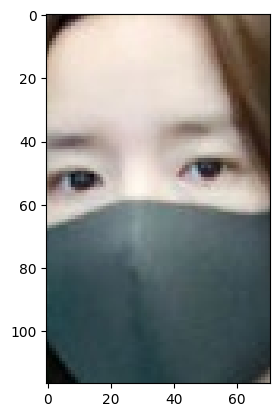

In [27]:
# displaying with mask image
img = mpimg.imread('/content/drive/MyDrive/ML/data/with_mask/with_mask_145.jpg')
imgplot = plt.imshow(img)
plt.show()

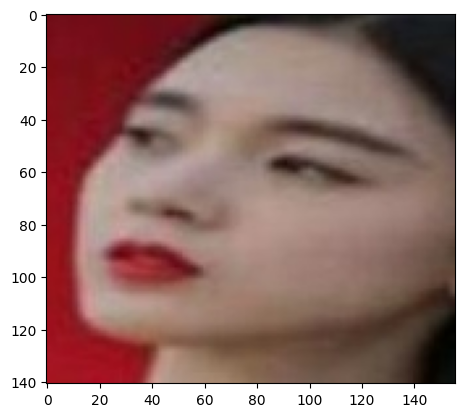

In [28]:
# displaying without mask image
img = mpimg.imread('/content/drive/MyDrive/ML/data/without_mask/without_mask_292.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [29]:
# convert images to numpy arrays+

with_mask_path = '/content/drive/MyDrive/ML/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/drive/MyDrive/ML/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[221, 231, 238],
        [238, 242, 248],
        [246, 247, 251],
        ...,
        [249, 249, 251],
        [249, 249, 251],
        [249, 249, 251]],

       [[218, 228, 235],
        [238, 243, 248],
        [246, 247, 251],
        ...,
        [249, 249, 251],
        [249, 249, 251],
        [249, 249, 251]],

       [[215, 226, 232],
        [238, 242, 248],
        [246, 247, 251],
        ...,
        [249, 249, 251],
        [249, 249, 251],
        [249, 249, 251]],

       ...,

       [[ 49,  56,  65],
        [ 74,  77,  81],
        [ 56,  66,  70],
        ...,
        [122, 112, 103],
        [119, 109, 101],
        [108, 100,  90]],

       [[ 48,  57,  65],
        [ 72,  75,  79],
        [ 59,  64,  66],
        ...,
        [118, 110, 101],
        [120, 109, 100],
        [111, 101,  94]],

       [[ 45,  53,  62],
        [ 71,  74,  78],
        [ 65,  70,  69],
        ...,
        [112, 104,  95],
        [118, 107,  98],
        [108,  98,  91]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [30]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


In [32]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
X_train[10]

array([[[90, 77, 68],
        [93, 80, 71],
        [98, 85, 77],
        ...,
        [24, 38, 38],
        [44, 58, 58],
        [55, 69, 69]],

       [[90, 76, 68],
        [92, 80, 70],
        [97, 84, 73],
        ...,
        [18, 32, 32],
        [24, 38, 38],
        [28, 41, 41]],

       [[83, 71, 61],
        [84, 73, 62],
        [87, 76, 64],
        ...,
        [33, 48, 48],
        [22, 37, 37],
        [17, 32, 31]],

       ...,

       [[63, 56, 50],
        [63, 56, 52],
        [64, 57, 53],
        ...,
        [64, 47, 37],
        [69, 52, 42],
        [72, 55, 45]],

       [[65, 58, 52],
        [65, 58, 52],
        [65, 58, 53],
        ...,
        [66, 49, 40],
        [69, 52, 42],
        [71, 54, 44]],

       [[66, 59, 53],
        [66, 59, 53],
        [66, 59, 53],
        ...,
        [68, 51, 41],
        [69, 52, 42],
        [70, 53, 43]]], dtype=uint8)

In [ ]:
X_train_scaled[10]

array([[[0.35294118, 0.30196078, 0.26666667],
        [0.36470588, 0.31372549, 0.27843137],
        [0.38431373, 0.33333333, 0.30196078],
        ...,
        [0.09411765, 0.14901961, 0.14901961],
        [0.17254902, 0.22745098, 0.22745098],
        [0.21568627, 0.27058824, 0.27058824]],

       [[0.35294118, 0.29803922, 0.26666667],
        [0.36078431, 0.31372549, 0.2745098 ],
        [0.38039216, 0.32941176, 0.28627451],
        ...,
        [0.07058824, 0.1254902 , 0.1254902 ],
        [0.09411765, 0.14901961, 0.14901961],
        [0.10980392, 0.16078431, 0.16078431]],

       [[0.3254902 , 0.27843137, 0.23921569],
        [0.32941176, 0.28627451, 0.24313725],
        [0.34117647, 0.29803922, 0.25098039],
        ...,
        [0.12941176, 0.18823529, 0.18823529],
        [0.08627451, 0.14509804, 0.14509804],
        [0.06666667, 0.1254902 , 0.12156863]],

       ...,

       [[0.24705882, 0.21960784, 0.19607843],
        [0.24705882, 0.21960784, 0.20392157],
        [0.25098039, 0

**Building a Convolutional Neural Networks (CNN)**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=2)

Epoch 1/2
170/170 [==============================] - 159s 916ms/step - loss: 0.4178 - acc: 0.8203 - val_loss: 0.2727 - val_acc: 0.8860
Epoch 2/2
170/170 [==============================] - 153s 898ms/step - loss: 0.2990 - acc: 0.8762 - val_loss: 0.2231 - val_acc: 0.9025


In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 12s 250ms/step - loss: 0.2452 - acc: 0.9054
Test Accuracy = 0.9053606986999512


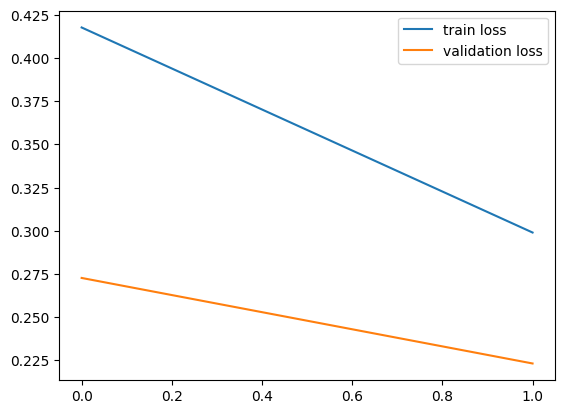

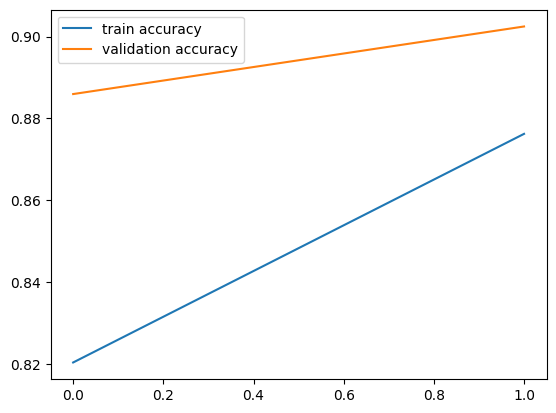

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

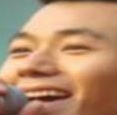

1/1 [==============================] - 0s 50ms/step
[[0.2825635 0.5770627]]
1
The person in the image is wearing a mask


In [49]:
# path_ip = '/content/drive/MyDrive/ML/data/without_mask/without_mask_1000.jpg'
# input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread('/content/drive/MyDrive/ML/data/without_mask/without_mask_127.jpg')

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


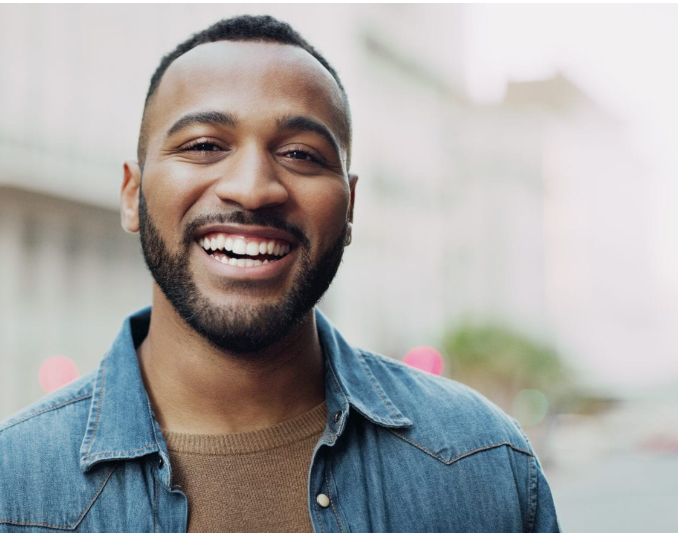

1/1 [==============================] - 0s 99ms/step
[[0.5119877  0.50137424]]
0
The person in the image is not wearing a mask


In [51]:
input_image = cv2.imread('/content/drive/MyDrive/ML/test2.png')

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

# Mục mới

# Mục mới